<a href="https://colab.research.google.com/github/MMRES-PyBootcamp/MMRES-python-bootcamp2021/blob/master/Exercise_Prostate_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="alert alert-block alert-danger"><b>TODO</b>

</div>

# Session 6 - Data visualization
> TODO An introduction on Pandas intermediate level concepts. Here we will present how to *manipulate* the data stored in a Pandas DataFrame, no matter if their Pandas Series store numerical, text or more complex data types. Finally we will introduce you some tools to *reshape* and/or *aggregate* data.

<div class="alert alert-block alert-danger"><b>TODO</b>

</div>

## Outline TODO
 * [Introduction](#Introduction)
 * [Plotting firsts steps (with Prostate Cancer Metadata)](#Plotting-firsts-steps-(with-Prostate-Cancer-Metadata))
   * [Basic data inspection (Metadata)](#Basic-data-inspection-(metadata))
   * [Visual data inspection: Matplotlib and Seaborn](#Visual-data-inspection:-Matplotlib-and-Seaborn) 
 * [The gallery of Seaborn (with Prostate Cancer UMAP)](#The-gallery-of-Seaborn-(with-Prostate-Cancer-UMAP))
   * [Basic data inspection (UMAP)](#Basic-data-inspection-(UMAP))
   * [Visual data inspection: `countplot()` and `histplot()`](#Visual-data-inspection:-countplot()-and-histplot())
   * [Visual data inspection: `boxplot()`, `violinplot()` and `stripplot()`](#Visual-data-inspection:-boxplot(),-violinplot()-and-stripplot())
   * [Visual data inspection: `scatterplot()`](#Visual-data-inspection:-scatterplot())

<div class="alert alert-block alert-success"><b>Practice:</b> Practice cells announce exercises that you should try during the current boot camp session.
</div>

<div class="alert alert-block alert-warning"><b>Extension:</b> Extension cells correspond to exercises (or links to contents) that are a bit more advanced. We recommend to try them after the current boot camp session.
</div>

<div class="alert alert-block alert-info"><b>Tip:</b> Tip cells just give some advice or complementary information.
</div>

<div class="alert alert-block alert-danger"><b>Caveat:</b> Caveat cells warn you about the most common pitfalls one founds when starts his/her path learning Python.

</div>

**This document is devised as a tool to enable your self-learning process. If you get stuck at some step or need any kind of help, please don't hesitate to raise your hand and ask for the teacher's guidance.**

---

## Introduction

In this session, we will explore the tools that Python offers to visualize data. The *art* of making nice plots is something that takes some time, but getting our first plots is really simple. In this tutorial, we will focus in the libraries [Matplotlib](http://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/). Matplotlib provides an absolute control on what you are plotting but often requires more code lines and a pretty handicraft work. With Seaborn you can get really nice plots in just a couple code lines (that's the reason why we choose this package). Like many other Python plotting packages, Seaborn is based in Matplotlib, and at the end of the day, we will leverage the best of each package to make our plots.

<div class="alert alert-block alert-info"><b>Tip:</b>

Each Python user has its own favourite plotting packages. In my case, despite I started with Seaborn, I recently switched to [Plotnine](https://plotnine.readthedocs.io/en/stable/) as my default. When I need plots with some degree of interactivity, I love using [Bokeh](https://docs.bokeh.org/en/latest/) instead. Try to find the packages that better fits your needs.    
</div>

We think that working with a true data set using a hands-on approach is the best way to learn the basics on data visualization with Matplotlib and Seaborn. For this reason we will try to reproduce some plots from the [Extended Data Figure 1](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7960507/figure/Fig5/) appearing in a [Nature Medicine](https://www.nature.com/nm/) paper entitled [*Transcriptional mediators of treatment resistance in lethal prostate cancer*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7960507/). The supplementary data of this publication is available at the [Broad Institute's Single Cell Portal](https://singlecell.broadinstitute.org/single_cell) (SCP). Let's have a look at the SCP entry for this project: [SCP1244](https://singlecell.broadinstitute.org/single_cell/study/SCP1244/transcriptional-mediators-of-treatment-resistance-in-lethal-prostate-cancer).

For this boot camp, we have [uploaded the data in our GitHub repository](https://github.com/MMRES-PyBootcamp/MMRES-python-bootcamp2022/tree/main/datasets/prostate_cancer_data) so that you don't need to create an SCP account. However, we encourage you to explore this resource by your own because it contains lots of interesting data that you can use for your projects. In addition, the user interface is very intuitive and allows you to perform some exploratory visualizations.

<div class="alert alert-block alert-danger"><b>TODO</b>

</div>

## Plotting firsts steps (with Prostate Cancer Metadata)

TODO antes de empezar a saco, haremos esto. Para ello trbajaremos con la metadata del dataset de Prostate Cancer.

We only need the `Seaborn` package and the *class* called `pyplot` from the `Matplotlib` package (which has most of what we usually need for plotting):

In [1]:
# Load packages with their corresponding alias
import pandas as pd

# Load plotting packages/classes with their corresponding alias
import seaborn as sns
import matplotlib.pyplot as plt

<div class="alert alert-block alert-danger"><b>TODO</b>

</div>

### Basic data inspection (Metadata)

Let's first import the metadata of the prostate cancer data set:

In [2]:
# Define the relative path towards the folder with our data files
path = 'datasets/prostate_cancer_data/'

# Reading file and storing it as a DataFrame
df_metadata = pd.read_csv(filepath_or_buffer=f'{path}scp_metadata.tsv', sep='\t', index_col=0, skiprows=[1])

Remember that it is always a good idea to get a bit familiar with the data you have between hands:

In [3]:
# DataFrame general information
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2169
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   biosample_id                                  2170 non-null   object
 1   donor_id                                      2170 non-null   int64 
 2   species                                       2170 non-null   object
 3   species__ontology_label                       2170 non-null   object
 4   disease                                       2170 non-null   object
 5   disease__ontology_label                       2170 non-null   object
 6   library_preparation_protocol                  2170 non-null   object
 7   library_preparation_protocol__ontology_label  2170 non-null   object
 8   sex                                           2170 non-null   object
 9   organ                                         2170 non-null   object
 10  

In [4]:
# DataFrame head (five first rows)
df_metadata.head()

,biosample_id,donor_id,species,species__ontology_label,disease,disease__ontology_label,library_preparation_protocol,library_preparation_protocol__ontology_label,sex,organ,organ__ontology_label
NAME,,,,,,,,,,,
0,01115149-TC,1115149,NCBITaxon_9606,Homo sapiens,MONDO_0004956,metastatic prostate carcinoma,EFO_0008931,Smart-seq2,male,UBERON_0002481,bone tissue
1,01115149-TC,1115149,NCBITaxon_9606,Homo sapiens,MONDO_0004956,metastatic prostate carcinoma,EFO_0008931,Smart-seq2,male,UBERON_0002481,bone tissue
2,01115149-TC,1115149,NCBITaxon_9606,Homo sapiens,MONDO_0004956,metastatic prostate carcinoma,EFO_0008931,Smart-seq2,male,UBERON_0002481,bone tissue
3,01115149-TC,1115149,NCBITaxon_9606,Homo sapiens,MONDO_0004956,metastatic prostate carcinoma,EFO_0008931,Smart-seq2,male,UBERON_0002481,bone tissue
4,01115149-TC,1115149,NCBITaxon_9606,Homo sapiens,MONDO_0004956,metastatic prostate carcinoma,EFO_0008931,Smart-seq2,male,UBERON_0002481,bone tissue


In [5]:
# DataFrame tail (last first rows)
df_metadata.tail()

,biosample_id,donor_id,species,species__ontology_label,disease,disease__ontology_label,library_preparation_protocol,library_preparation_protocol__ontology_label,sex,organ,organ__ontology_label
NAME,,,,,,,,,,,
2165,09171144,9171144,NCBITaxon_9606,Homo sapiens,MONDO_0004956,metastatic prostate carcinoma,EFO_0008931,Smart-seq2,male,UBERON_0002481,bone tissue
2166,09171144,9171144,NCBITaxon_9606,Homo sapiens,MONDO_0004956,metastatic prostate carcinoma,EFO_0008931,Smart-seq2,male,UBERON_0002481,bone tissue
2167,09171144,9171144,NCBITaxon_9606,Homo sapiens,MONDO_0004956,metastatic prostate carcinoma,EFO_0008931,Smart-seq2,male,UBERON_0002481,bone tissue
2168,09171144,9171144,NCBITaxon_9606,Homo sapiens,MONDO_0004956,metastatic prostate carcinoma,EFO_0008931,Smart-seq2,male,UBERON_0002481,bone tissue
2169,09171144,9171144,NCBITaxon_9606,Homo sapiens,MONDO_0004956,metastatic prostate carcinoma,EFO_0008931,Smart-seq2,male,UBERON_0002481,bone tissue


It seems that some columns in `df_metadata` (`species`, `species__ontology_label`, `disease`, `disease__ontology_label`...) have redundant values, let's check it out:

In [6]:
# Get `df_metadata` (whole DataFrame) unique values
df_metadata.nunique()

biosample_id                                    15
donor_id                                        14
species                                          1
species__ontology_label                          1
disease                                          1
disease__ontology_label                          1
library_preparation_protocol                     1
library_preparation_protocol__ontology_label     1
sex                                              1
organ                                            3
organ__ontology_label                            3
dtype: int64

### Visual data inspection: Matplotlib and Seaborn

We will begin with some histograms using the Seaborn function [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html). Note how easy is to extract the information from our `df_metadata` DataFrame and visualize it:

<AxesSubplot:xlabel='organ__ontology_label', ylabel='Count'>

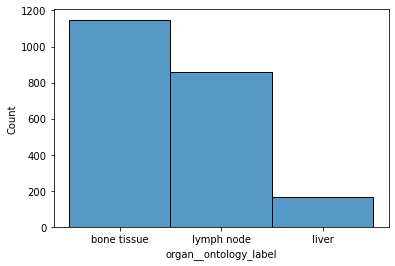

In [7]:
# Plot histogram of 'organ__ontology_label' column from `df_metadata` DataFrame...
sns.histplot(data=df_metadata, x='organ__ontology_label')

<AxesSubplot:xlabel='organ__ontology_label', ylabel='Count'>

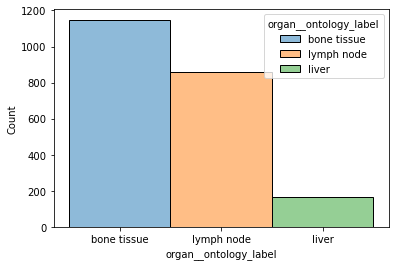

In [8]:
# ... add column 'organ__ontology_label' as hue
sns.histplot(data=df_metadata, x='organ__ontology_label', hue='organ__ontology_label')

<AxesSubplot:xlabel='organ__ontology_label', ylabel='Count'>

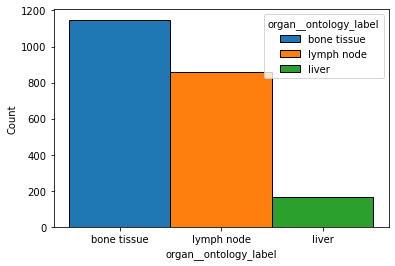

In [9]:
# ... raise alpha (opacity) to maximum
sns.histplot(data=df_metadata, x='organ__ontology_label', hue='organ__ontology_label', alpha=1)

<div class="alert alert-block alert-info"><b>Tip:</b>

The parameter *alpha* refers to [alpha compositing](https://en.wikipedia.org/wiki/Alpha_compositing). This parameter is ubiquitous across plotting packages and defines the *opacity*, `alpha=0` meaning fully transparent and `alpha=1` fully opaque. 

</div>

<AxesSubplot:xlabel='organ__ontology_label', ylabel='Count'>

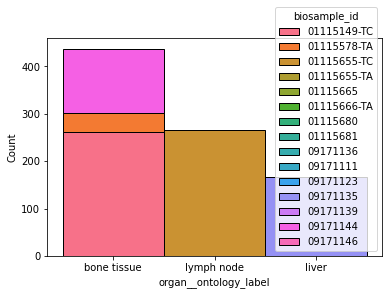

In [10]:
# ... change to column 'biosample_id' as hue
sns.histplot(data=df_metadata, x='organ__ontology_label', hue='biosample_id', alpha=1)

<div class="alert alert-block alert-danger"><b>Caveat:</b>
 
Note that Seaborn plots the bars one on top of the other.

</div>

<AxesSubplot:xlabel='organ__ontology_label', ylabel='Count'>

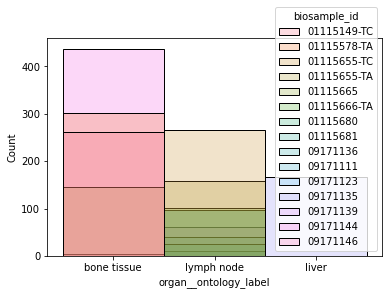

In [11]:
# ... decrease the alpha
sns.histplot(data=df_metadata, x='organ__ontology_label', hue='biosample_id', alpha=0.25)

In order to avoid this annoying superposition of bars, we could *stack* or *dodge* them:

<AxesSubplot:xlabel='organ__ontology_label', ylabel='Count'>

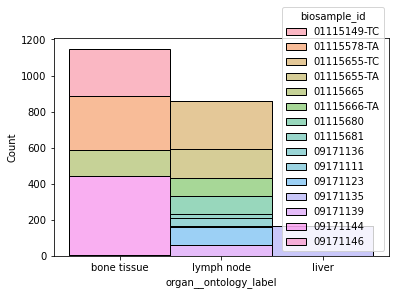

In [12]:
# ... stack the bars (one on top the other)
sns.histplot(data=df_metadata, x='organ__ontology_label', hue='biosample_id', alpha=0.5, multiple="stack")

<AxesSubplot:xlabel='organ__ontology_label', ylabel='Count'>

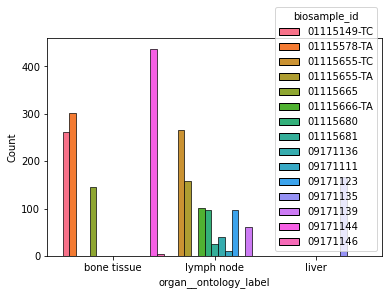

In [13]:
# ... dodge the bars (side by side) and raise the alpha again
sns.histplot(data=df_metadata, x='organ__ontology_label', hue='biosample_id', alpha=1, multiple="dodge")

Finally, let's change the position of the legend using the Seaborn function [`move_legend()`](https://seaborn.pydata.org/generated/seaborn.move_legend.html), and also add a nice title using the [`.set()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set.html) method available for matplotlib `axes` objects:

[Text(0.5, 1.0, 'Biosample count by organ')]

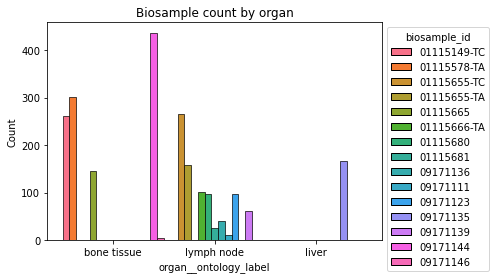

In [14]:
# Plot and store the output matplotlib axes object as `ax`
ax = sns.histplot(data=df_metadata, x='organ__ontology_label', hue='biosample_id', alpha=1, multiple="dodge")

# Move the legend using a Seaborn function
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# Add title
ax.set(title='Biosample count by organ')

<div class="alert alert-block alert-success"><b>Practice:</b>

Visualize the data from `df_metadata`. Un-comment and fill only those code lines with underscores `___`.
    
1) In the 1<sup>st</sup> code cell below, use Seaborn `hist()` function to plot the `'biosample_id'` count (x-axis) by `'organ__ontology_label'` (hue-color).
    
2) Use dodging and maximum opacity to format the bars.

3) Store the the output matplotlib axes object as `ax`.

4) Use the axes method `.tick_params()` to rotate x labels 90 degress.

</div>

In [15]:
# Plot histogram with Seaborn
# ax = sns.histplot(
#                   data=___,
#                   x=___,
#                   hue=___,
#                   alpha=___,
#                   multiple=___
#                   )

# Rotate xlabels 90 degrees
# ax.tick_params(axis=___, rotation=___)

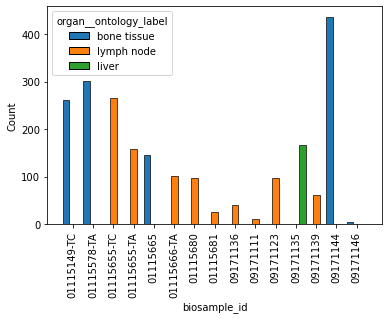

In [16]:
# Plot histogram with Seaborn
ax = sns.histplot(
                   data=df_metadata,
                   x="biosample_id",
                   hue='organ__ontology_label',
                   alpha=1,
                   multiple="dodge"
                  )

# Rotate xlabels 90 degrees
ax.tick_params(axis='x', rotation=90)

<div class="alert alert-block alert-warning"><b>Extension:</b>

A Matplotlib plot is an *object* comprising a hierarchical structure of components. Usually the top level it is an instance of the `figure` class. Going below in the hierarchy we found the area where you draw, which is technically called the `axes` class. Keep in mind that a `figure` class can contain multiple `axes` classes within (for example, if you have subplots or insets). Similarly, the `axes` class have `title` or  `xaxis` and `yaxis`, ... which in turn have their own `majorTicks` ``minorTicks``, `label`, ... and so on.
  
If you have a single `axes` class instantiated, like in the examples above, you can access and change most parts of the hierarchy like we did above with `ax0.title`. If you want to do anything non-trivial, you have to compose the figure and its components yourself.

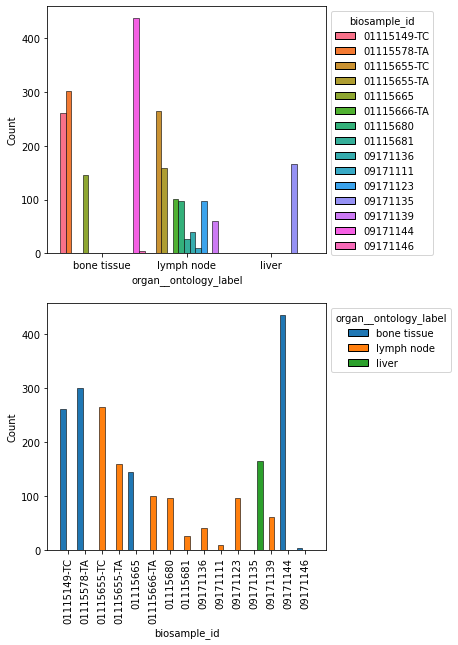

In [17]:
# Initiate a matplotlib 2x1 figure as `fig` with their corresponding (empty) axes
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5, 10))

# Create a histogram in each subplot
sns.histplot(data=df_metadata, x='organ__ontology_label', hue='biosample_id', alpha=1, multiple="dodge", ax=axes[0])
sns.histplot(data=df_metadata, x="biosample_id", hue='organ__ontology_label', alpha=1, multiple="dodge", ax=axes[1])

# Move the legends in each subplot outside the plotting area
sns.move_legend(fig.axes[0], "upper left", bbox_to_anchor=(1, 1))
sns.move_legend(fig.axes[1], "upper left", bbox_to_anchor=(1, 1))

# Rotate xlabels from the second ax 90 degrees
fig.axes[1].tick_params(axis='x', rotation=90)

## The gallery of Seaborn (with Prostate Cancer UMAP)

Seaborn has many plotting functions (have a look to its [example gallery](https://seaborn.pydata.org/examples/index.html)). Here we will show several visualization examples in order to cover the most typical plotting functions from Seaborn.

<div class="alert alert-block alert-info"><b>Tip:</b>

As you can see, Seaborn offers a sundry of possible plotting functions. Not all visualizations suit equally good on all data, so it is recommended to devote some time devising this matter before trying random plotting functions in berserk mode.
</div>

### Basic data inspection (UMAP)

This time, we will import the file with the estimates for the Uniform Manifold Approximation and Projection (UMAP) space.

In [18]:
# Define the relative path towards the folder with our data files
path = 'datasets/prostate_cancer_data/'

# Reading file and storing it as a DataFrame
df_all = pd.read_csv(filepath_or_buffer=f'{path}scp_clustering.tsv', sep='\t', index_col=0, skiprows=[1])

In [19]:
# DataFrame general information
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2169
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cluster dominant cell type  2170 non-null   object 
 1   supercluster for LDSC-SEG   2170 non-null   object 
 2   X                           2170 non-null   float64
 3   Y                           2170 non-null   float64
dtypes: float64(2), object(2)
memory usage: 84.8+ KB


In [20]:
# DataFrame head (five first rows)
df_all.head()

,cluster dominant cell type,supercluster for LDSC-SEG,X,Y
NAME,,,,
0,prostate cancer cell,prostate cancer,-9.846067,15.959372
1,plasmablast,B lineage,-5.832184,-11.471057
2,prostate cancer cell,prostate cancer,-9.804746,15.918493
3,prostate cancer cell,prostate cancer,-9.771317,15.883966
4,CD4+ T cell,NK/T,6.499261,-2.979782


In [21]:
# DataFrame head (five first rows)
df_all.tail()

,cluster dominant cell type,supercluster for LDSC-SEG,X,Y
NAME,,,,
2165,erythroid cell,erythroid,-15.387140,-1.385025
2166,erythroid cell,erythroid,-17.330405,-0.601710
2167,erythroid cell,erythroid,-15.644387,-1.436530
2168,erythroid cell,erythroid,-16.960263,-0.800296
2169,erythroid cell,erythroid,-18.044279,0.771923


In [22]:
# Get `df_all` (whole DataFrame) unique values
df_all.nunique()

cluster dominant cell type      15
supercluster for LDSC-SEG        6
X                             2170
Y                             2170
dtype: int64

### Visual data inspection: `countplot()` and `histplot()`

You can use [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html), for example, to quickly get a first overview on how a categorical variable is distributed:

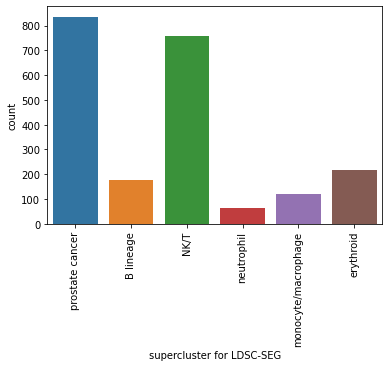

In [23]:
# Get countplot
ax = sns.countplot(data=df_all, x='supercluster for LDSC-SEG')

# Rotate xlabels 90 degrees
ax.tick_params(axis='x', rotation=90)

The function [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) can also be used to this aim:

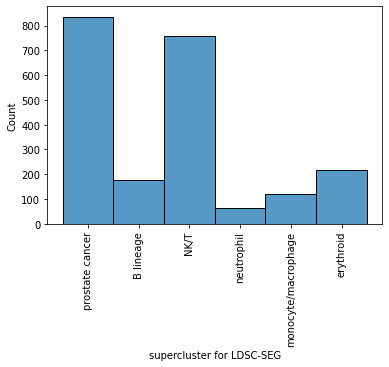

In [24]:
# Get histplot
ax = sns.histplot(data=df_all, x='supercluster for LDSC-SEG')

# Rotate xlabels 90 degrees
ax.tick_params(axis='x', rotation=90)

If the variable to inspect is numerical, you should better use `histplot()` instead of `countplot()`:

In [25]:
# Melt 'X' and 'Y', keeping 'cluster dominant cell type', 'supercluster for LDSC-SEG'
df_all_melt = pd.melt(frame=df_all,
                      id_vars=['cluster dominant cell type', 'supercluster for LDSC-SEG'],
                      value_vars=['X', 'Y'],
                      var_name='Coordinate',
                      value_name='UMAP value')

In [26]:
# TODO
df_all_melt.head()

,cluster dominant cell type,supercluster for LDSC-SEG,Coordinate,UMAP value
0,prostate cancer cell,prostate cancer,X,-9.846067
1,plasmablast,B lineage,X,-5.832184
2,prostate cancer cell,prostate cancer,X,-9.804746
3,prostate cancer cell,prostate cancer,X,-9.771317
4,CD4+ T cell,NK/T,X,6.499261


In [27]:
# TODO
df_all_melt.tail()

,cluster dominant cell type,supercluster for LDSC-SEG,Coordinate,UMAP value
4335,erythroid cell,erythroid,Y,-1.385025
4336,erythroid cell,erythroid,Y,-0.601710
4337,erythroid cell,erythroid,Y,-1.436530
4338,erythroid cell,erythroid,Y,-0.800296
4339,erythroid cell,erythroid,Y,0.771923


<AxesSubplot:xlabel='UMAP value', ylabel='Percent'>

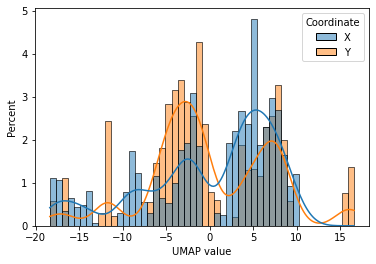

In [28]:
# Get histplot (you can try additional stat arguments, such as 'count', 'frequency', 'density', 'probability', 'proportion', 'percent')
sns.histplot(data=df_all_melt, x='UMAP value', hue='Coordinate', stat='percent', kde=True, bins=50)

### Visual data inspection: `boxplot()`, `violinplot()` and `stripplot()`

We have seen that `histplot()` is recommended to inspect how a numerical variable is distributed. Sometimes we might need to know such distribution but splitting by a some categorical variable. In this case, Seaborn functions [`boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html), [`violinplot()`](https://seaborn.pydata.org/generated/seaborn.violinplot.html) and [`stripplot()`](https://seaborn.pydata.org/generated/seaborn.stripplot.html).

0
1
2


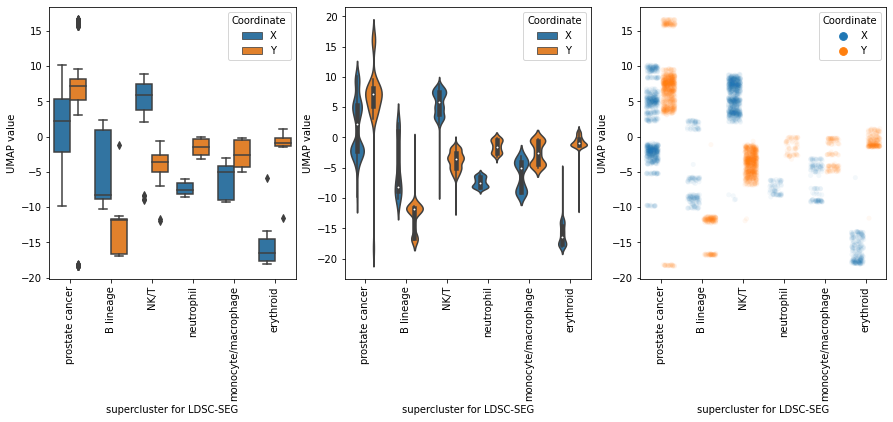

In [29]:
# Initiate a matplotlib 2x1 figure as `fig` with their corresponding (empty) axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Get boxpot, violinplot and stripplot
sns.boxplot(data=df_all_melt, x='supercluster for LDSC-SEG', y='UMAP value', hue='Coordinate', ax=axes[0])
sns.violinplot(data=df_all_melt, x='supercluster for LDSC-SEG', y='UMAP value', hue='Coordinate', ax=axes[1])
sns.stripplot(data=df_all_melt, x='supercluster for LDSC-SEG', y='UMAP value', hue='Coordinate', dodge=True, alpha=0.05, jitter=0.3, ax=axes[2])

# TODO
for i, ax in enumerate(axes):
    print(i)
    
    # Rotate xlabels from the second ax 90 degrees
    fig.axes[i].tick_params(axis='x', rotation=90)

When looking at a *box plot* it is difficult to tell at a glance if the underlying data is normally distributed or not. Violin plots are more convenient to get a better insight on the true data distribution. Strip plots can also be useful to this aim if you adjust a bit with `alpha=` and `jitter=` arguments (don't forget to use `dodge=True` in strip plots if you pass a categorical variable to the `hue=` argument).

<div class="alert alert-block alert-info"><b>Tip:</b>

The parameter *jitter* refers to lateral (vertical in the example above) random spreading of data points. Sometimes, increasing the jitter (by default `jitter=0.1`) is useful to have a better glimpse of the data we have between hands.

</div>

### Visual data inspection: `scatterplot()`

The most straightforward way to visualize the relationship between two numerical magnitudes is the scatterplot:

<AxesSubplot:xlabel='X', ylabel='Y'>

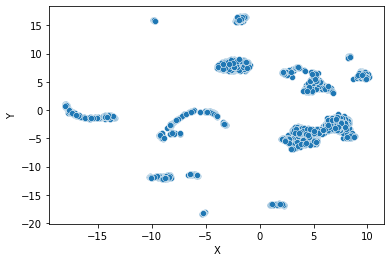

In [30]:
# Get scatterplot
sns.scatterplot(data=df_all, x='X', y='Y')

Let's us go a step further with scatter plots and try to reproduce panel _d_ from the [Extended Data Figure 1](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7960507/figure/Fig5/) appearing in a [Nature Medicine](https://www.nature.com/nm/) paper entitled [*Transcriptional mediators of treatment resistance in lethal prostate cancer*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7960507/). Since the data in such panel combines information from UMAP and metadata, we need first to get a DataFrame combining `df_all` and `df_metadata`:

In [31]:
# Merge `df_all` and `df_metadata` as `df_all_metadata`
df_all_metadata = df_all.merge(df_metadata, right_index=True, left_index=True, how='inner')

# DataFrame general information
df_all_metadata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2169
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   cluster dominant cell type                    2170 non-null   object 
 1   supercluster for LDSC-SEG                     2170 non-null   object 
 2   X                                             2170 non-null   float64
 3   Y                                             2170 non-null   float64
 4   biosample_id                                  2170 non-null   object 
 5   donor_id                                      2170 non-null   int64  
 6   species                                       2170 non-null   object 
 7   species__ontology_label                       2170 non-null   object 
 8   disease                                       2170 non-null   object 
 9   disease__ontology_label                       2170 non-null   o

As desired, we just added the `df_metadata` columns to the `df_all` DataFrame. Let's tweak a bit more our first scatter plot from above:

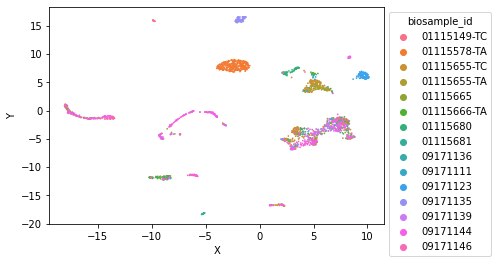

In [32]:
# Get scatterplot
ax = sns.scatterplot(data=df_all_metadata, x='X', y='Y', hue='biosample_id', linewidth=0, s=3)

# Move the legend using a Seaborn function
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

That's panel _d_ from the [Extended Data Figure 1](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7960507/figure/Fig5/), isn't it? And in just a couple Python code lines!

<div class="alert alert-block alert-success"><b>Practice:</b>

Reproduce panel _e_ from the [Extended Data Figure 1](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7960507/figure/Fig5/) appearing in a [Nature Medicine](https://www.nature.com/nm/) paper entitled [*Transcriptional mediators of treatment resistance in lethal prostate cancer*](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7960507/).

1) In the 1<sup>st</sup> code cell below, use Seaborn `scatterplot()` function to plot the relationship between UMAP coordinates `'X'` and `'Y'`.

2) Remove the circles white coronas by specifying `linewidth=0`. 

3) Reduce circle size by specifying `s=3`.    

4) Highlight from which organ each cell came from by specifying `hue='organ__ontology_label'`.

Note how easy is to use a custom color palette (or predefined [Seaborn color palette](https://seaborn.pydata.org/tutorial/color_palettes.html)). You just need to define a list with the colors we want in HEX format and call the Seaborn function `color_palette()` to create your own palette.

5) Change the color palette by specifying `palette=custom_palette`.

</div>

<AxesSubplot:>

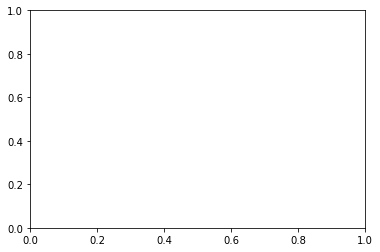

In [33]:
# Create list with custom colors in HEX format
list_colors = ["#af635b", "#979c5f", "#624f74"]

# Create custom color palette
custom_palette = sns.color_palette(list_colors)

# Reproduce panel _e_ from the Extended Data Figure 1
sns.scatterplot()

<AxesSubplot:xlabel='X', ylabel='Y'>

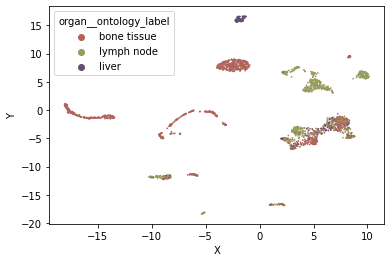

In [34]:
# Create list with custom colors in HEX format
list_colors = ["#af635b", "#979c5f", "#624f74"]

# Create custom color palette
custom_palette = sns.color_palette(list_colors)

# Reproduce panel _e_ from the Extended Data Figure 1
sns.scatterplot(
                data=df_all_metadata,
                y='Y',
                x='X',
                hue='organ__ontology_label',
                linewidth=0,
                s=3,
                palette=custom_palette
               )

We did it again! That's panel _e_ from the [Extended Data Figure 1](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7960507/figure/Fig5/)!

<div class="alert alert-block alert-danger"><b>TODO</b>

</div>

## Faceting: `catplot()`, `displot()`, `relplot()`, `lmplot()`

Sometimes you might need to visualize your data splitting by multiple categorical variables. In these situations, the `hue=` argument from Seaborn plotting functions is not enough and you will need figure *faceting* in multiple *rows* and *columns* of axes. Let's see how faceting woks in Seaborn.

## Plotting numerical relationships

### TODO Seaborn's `relplot()`

Now let's play a bit with the Seaborn function [`catplot()`](https://seaborn.pydata.org/generated/seaborn.catplot.html). This function is very versatile and useful to inspect quantitative data taking into account their different facets according to some categorical data.

In [ ]:
df_all_metadata = df_all.merge(df_metadata, right_index=True, left_index=True, how='inner')

In [ ]:
df_all_metadata

Remember that is always recommended to get a bit familiar with the data 

### `displot()`

TODO [`displot()`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot)
TODO [`relplot()`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot)
TODO [`lmplot()`](https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot)


ACEPTAN COL I ROW

In [ ]:
sns.displot(data=df_all_melt, x='UMAP value', hue='Coordinate', stat='count', kde=True, bins=50)

### A bit more about Seaborn

Now let's play a bit with the Seaborn function [`catplot()`](https://seaborn.pydata.org/generated/seaborn.catplot.html). This function is very versatile and useful to inspect quantitative data taking into account their different facets according to some categorical data.

In [ ]:
# Get a categorical plot (Box)
sns.catplot(kind='box', data=df_all, x='X', y='supercluster for LDSC-SEG')

Note that `catplot()` returns an "axes grid" instead of "axes" (we will better understand at the next exercise).

In [ ]:
# Get a categorical plot (Violin)
sns.catplot(kind='violin', data=df_all, y='supercluster for LDSC-SEG', x='X')

In [ ]:
# Get a categorical plot (Strip)
sns.catplot(kind='strip', data=df_all, y='supercluster for LDSC-SEG', x='X')

In [ ]:
# Get a categorical plot (Strip) adjusting a bit jitter and alpha
sns.catplot(kind='strip', data=df_all, y='supercluster for LDSC-SEG', x='X', jitter=0.4, alpha=0.2)

<div class="alert alert-block alert-success"><b>Practice:</b>

Visualize the data from `df_all`. Un-comment and fill only those code lines with underscores `___`.
    
1) In the 1<sup>st</sup> code cell below, use Seaborn `catplot()` function with `kind='strip'` to plot the `'X'` values distribution (x-axis) by `'cluster dominant cell type'` (y-axis).
    
2) Split the data in columns by `supercluster for LDSC-SEG` using the `catplot()` argument `col=`.
    
3) Wrap the columns obtained in trios with the `catplot()` argument `col_wrap=`.

4) Tune the `catplot()` arguments `jitter=` and `alpha=` until getting a more aesthetic result according your criteria.
  
5) Are all cell types represented in all superclusters?

</div>

In [ ]:
# Get a categorical plot (Strip) splitting in columns
# sns.catplot(
#             kind=___,
#             data=___,
#             y=___,
#             x=___,
#             col=___,
#             col_wrap=___,
#             jitter=___,
#             alpha___
#            )

In [ ]:
# Get a categorical plot (Strip) and split a category in columns
sns.catplot(
            kind='strip',
            data=df_all,
            y='cluster dominant cell type',
            x='X',
            col='supercluster for LDSC-SEG',
            col_wrap=3,
            jitter=0.3,
            alpha=0.4
           )

<div class="alert alert-block alert-danger"><b>TODO</b>

</div>